In [7]:
import sklearn.preprocessing as preprocessing

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as ltb
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder  
import scipy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
diamonds = pd.read_csv("./data/diamonds_clean.csv")

In [9]:
X = diamonds.drop("price", axis=1)
y = diamonds.price

In [10]:
cut = pd.get_dummies(diamonds.cut, prefix="cut")
color = pd.get_dummies(diamonds.color, prefix=("color"))
clarity = pd.get_dummies(diamonds.clarity, prefix=("clarity"))
X = pd.concat([cut, color, clarity, diamonds.carat, diamonds.depth/diamonds.table, diamonds.depth, diamonds.table], axis=1)
X

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,0,depth,table
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1.21,1.075862,62.4,58.0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0.32,1.105263,63.0,57.0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0.71,1.190909,65.5,55.0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0.41,1.139286,63.8,56.0
4,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1.02,1.025424,60.5,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40407,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1.34,1.100000,62.7,57.0
40408,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,2.02,0.951667,57.1,60.0
40409,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1.01,1.119643,62.7,56.0
40410,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.33,1.139963,61.9,54.3


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
pipe=Pipeline([("scalar",StandardScaler()),
             ("rf_classifier", RandomForestRegressor(n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=None, bootstrap=True))])

In [13]:
pipe.fit(X_train, y_train)

C:\Users\diego\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\diego\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Pipeline(steps=[('scalar', StandardScaler()),
                ('rf_classifier',
                 RandomForestRegressor(min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=800))])

In [14]:
predictions = pipe.predict(X_test)
check = pd.DataFrame({'Ground truth':y_test, 'Predictions':predictions, 'Diff':y_test-predictions})
check

C:\Users\diego\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Ground truth,Predictions,Diff
17115,9343,9315.189329,27.810671
36402,5600,5084.737322,515.262678
7845,5165,4676.059103,488.940897
15572,561,553.051942,7.948058
28006,8889,9893.041065,-1004.041065
...,...,...,...
28886,2307,2072.979072,234.020928
24011,5392,5391.784290,0.215710
28696,5385,6251.607984,-866.607984
29144,2416,3234.783917,-818.783917


In [15]:
study = check
study['absoluteDiff'] = (study['Diff'] ** 2)** 0.5
errorIndex = list(study.sort_values(by='absoluteDiff', ascending=False).head(1000).index)
error = diamonds.loc[errorIndex].sort_values(by='price', ascending=False)
error.groupby('clarity').count()

,Unnamed: 0,cut,color,depth,carat,table,x,y,z,price
clarity,,,,,,,,,,
I1,24,24,24,24,24,24,24,24,24,24
IF,20,20,20,20,20,20,20,20,20,20
SI1,265,265,265,265,265,265,265,265,265,265
SI2,283,283,283,283,283,283,283,283,283,283
VS1,110,110,110,110,110,110,110,110,110,110
VS2,206,206,206,206,206,206,206,206,206,206
VVS1,36,36,36,36,36,36,36,36,36,36
VVS2,56,56,56,56,56,56,56,56,56,56


In [16]:
rmse = mean_squared_error(y_test, predictions)**0.5
rmse

547.0657019941086

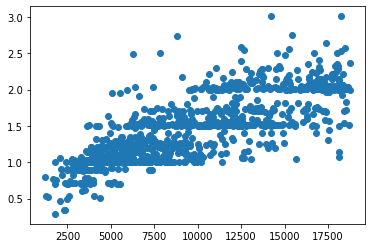

In [17]:
plt.scatter(error.price, error.carat)

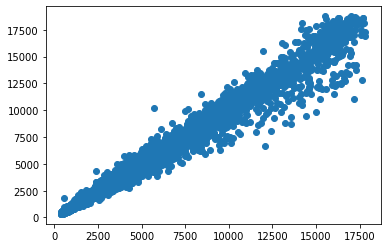

In [18]:
plt.scatter(check["Predictions"], check['Ground truth'])

In [19]:
d_test = pd.read_csv("./data/diamonds_test.csv")
d_test = d_test.drop("city", axis=1)
cut = pd.get_dummies(d_test.cut, prefix="cut")
color = pd.get_dummies(d_test.color, prefix=("color"))
clarity = pd.get_dummies(d_test.clarity, prefix=("clarity"))
X2 = pd.concat([cut, color, clarity, d_test.carat, d_test.depth/d_test.table, d_test.depth, d_test.table], axis=1)
X2

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,0,depth,table
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0.79,1.045000,62.7,60.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.20,1.070175,61.0,57.0
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1.57,1.019672,62.2,61.0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0.90,1.181481,63.8,54.0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0.50,1.084483,62.9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0.57,1.105357,61.9,56.0
13481,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.71,1.130909,62.2,55.0
13482,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.70,1.120000,61.6,55.0
13483,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0.70,1.031579,58.8,57.0


In [20]:
predictions2 = pipe.predict(X2)

C:\Users\diego\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [21]:
submission = pd.DataFrame()

In [22]:
submission['price'] = predictions2
submission.reset_index(inplace=True)
submission.rename(columns={"index": "id"}, inplace=True)
submission

,id,price
0,0,3017.501757
1,1,5327.394180
2,2,10624.190269
3,3,4136.686380
4,4,1727.411528
...,...,...
13480,13480,1679.390387
13481,13481,2349.780423
13482,13482,3181.374554
13483,13483,2189.135918


In [23]:
submission.to_csv("./data/submission1.csv", index=False)